In [4]:
import os
import
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
import fiona
import shapely

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [84]:
dfs = []
for filename in os.listdir('data'):
    if 'csv' in filename:

        print("Now reading: %s"%(filename))
        df = pd.read_csv("data/%s"%(filename), engine='python')
        # append category name used for query
        df['cat'] = filename[:-4]
        # combine longitude and latitude
        df['lonlat'] = list(zip(df['coordinates.longitude'], df['coordinates.latitude']))
        # create geometry as shapely Point object
        df['geometry'] = df[['lonlat']].applymap(lambda x: shapely.geometry.Point(x))
        # transform the dataframe to a geodataframe
        gdf = gpd.GeoDataFrame(df, geometry='geometry')
        # set crs
        gdf.crs = {'init': 'epsg:4326'}
        gdf = gdf[['name', 'alias', 'cat', 'categories',
                   'geometry', 'coordinates.longitude', 'coordinates.latitude',
                   'location.display_address', 'location.city', 'location.state',
                   'location.zip_code', 'price', 'rating', 'review_count',
                   'is_closed', 'transactions']]
        
        dfs.append(gdf)

df_all = pd.concat(dfs, ignore_index=True)

# change categorical to dummies
tmp = []
trans = ['pickup', 'delivery', 'restaurant_reservation']

for i in range(len(df_all)):
    cat_var = [s in df_all['transactions'][i] for s in trans]
    tmp.append(cat_var)

tmp = np.array(tmp).T
df_all['tr_pickup'] = tmp[0]
df_all['tr_delivery'] = tmp[1]
df_all['tr_reservation'] = tmp[2]
df_all.drop('transactions', axis=1, inplace=True)

# change booleans to 0 and 1
cols = ['is_closed', 'tr_pickup', 'tr_delivery', 'tr_reservation']
df_all[cols] = df_all[cols].replace({False: 0, True: 1})

# change categorical to numerical categories
df_all['price'] = df_all['price'].replace({'$': 1,
                                           '$$': 2,
                                           '$$$': 3,
                                           '$$$$': 4})

# rename columns
df_all.columns = ['name', 'alias', 'cat', 'categories', 'geometry',
                  'longitude', 'latitude',
                  'address', 'city', 'state',
                  'zipcode', 'price', 'rating', 'reviews', 'closed',
                  'tr_pickup', 'tr_delivery', 'tr_restaurant_reservation']
# save output
df_all.to_csv("result.csv")
print("Complete!")

# gdf = gpd.GeoDataFrame(df_all, geometry=df_all.geometry)
# gdf.to_csv("result.csv")
# gdf.to_file("result.shp")

Now reading: Kosher.csv
Now reading: Indian.csv
Now reading: Pakistani.csv
Now reading: Haitian.csv
Now reading: Laotian.csv
Now reading: Puerto Rican.csv
Now reading: Cambodian.csv
Now reading: Thai.csv
Now reading: Jewish.csv
Now reading: Shanghainese.csv
Now reading: Filipino.csv
Now reading: Malaysian.csv
Now reading: Vietnamese.csv
Now reading: Taiwanese.csv
Complete!


In [86]:
# read data
data = pd.read_csv("result.csv")
data.head()

,Unnamed: 0,name,alias,cat,categories,geometry,longitude,latitude,address,city,state,zipcode,price,rating,reviews,closed,tr_pickup,tr_delivery,tr_restaurant_reservation
0,0,Cafe 11,cafe-11-new-york-4,Kosher,"[{u'alias': u'kosher', u'title': u'Kosher'}, {...",POINT (-74.0140703 40.7052529),-74.014070,40.705253,"[11 Broadway, New York, NY 10004]",New York,NY,10004.0,2.0,4.5,29,0,0,0,0
1,1,Paprika Kosher Catering & Restaurant,paprika-kosher-catering-and-restaurant-new-york,Kosher,"[{u'alias': u'mediterranean', u'title': u'Medi...",POINT (-73.98220000000001 40.74727),-73.982200,40.747270,"[56 E 34th St, New York, NY 10016]",New York,NY,10016.0,2.0,4.0,44,0,1,1,0
2,2,Marani,marani-rego-park-5,Kosher,"[{u'alias': u'mediterranean', u'title': u'Medi...",POINT (-73.8597332958 40.731501959),-73.859733,40.731502,"[9726 63rd Rd, Rego Park, NY 11374]",Rego Park,NY,11374.0,2.0,4.5,171,0,1,1,0
3,3,ALENbi,alenbi-brooklyn,Kosher,"[{u'alias': u'mideastern', u'title': u'Middle ...",POINT (-73.95061149999999 40.666413),-73.950611,40.666413,"[887 Nostrand Ave, Brooklyn, NY 11225]",Brooklyn,NY,11225.0,4.0,4.5,16,0,0,0,0
4,4,Nish Nush,nish-nush-new-york-5,Kosher,"[{u'alias': u'vegetarian', u'title': u'Vegetar...",POINT (-74.007949 40.709472),-74.007949,40.709472,"[41 John St, New York, NY 10038]",New York,NY,10038.0,2.0,4.5,181,0,1,1,0


In [96]:
X = data.iloc[:,[3,6,7,12]]
X = pd.get_dummies(X)
X.dropna(inplace=True)
X.head()

,longitude,latitude,price,cat_Cambodian,cat_Filipino,cat_Haitian,cat_Indian,cat_Jewish,cat_Kosher,cat_Laotian,cat_Malaysian,cat_Pakistani,cat_Puerto Rican,cat_Shanghainese,cat_Taiwanese,cat_Thai,cat_Vietnamese
0,-74.014070,40.705253,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,-73.982200,40.747270,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,-73.859733,40.731502,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,-73.950611,40.666413,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-74.007949,40.709472,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# K-means

In [90]:
from sklearn.cluster import KMeans

In [123]:
# set n_clusters
k = 5

# cluster on hourly data
km = KMeans(n_clusters=k, random_state=234)
km.fit(X)

# append labels
res = km.predict(X)
res = pd.concat((data, pd.Series(res)), axis=1)
res.rename(columns={0:'label'}, inplace=True)

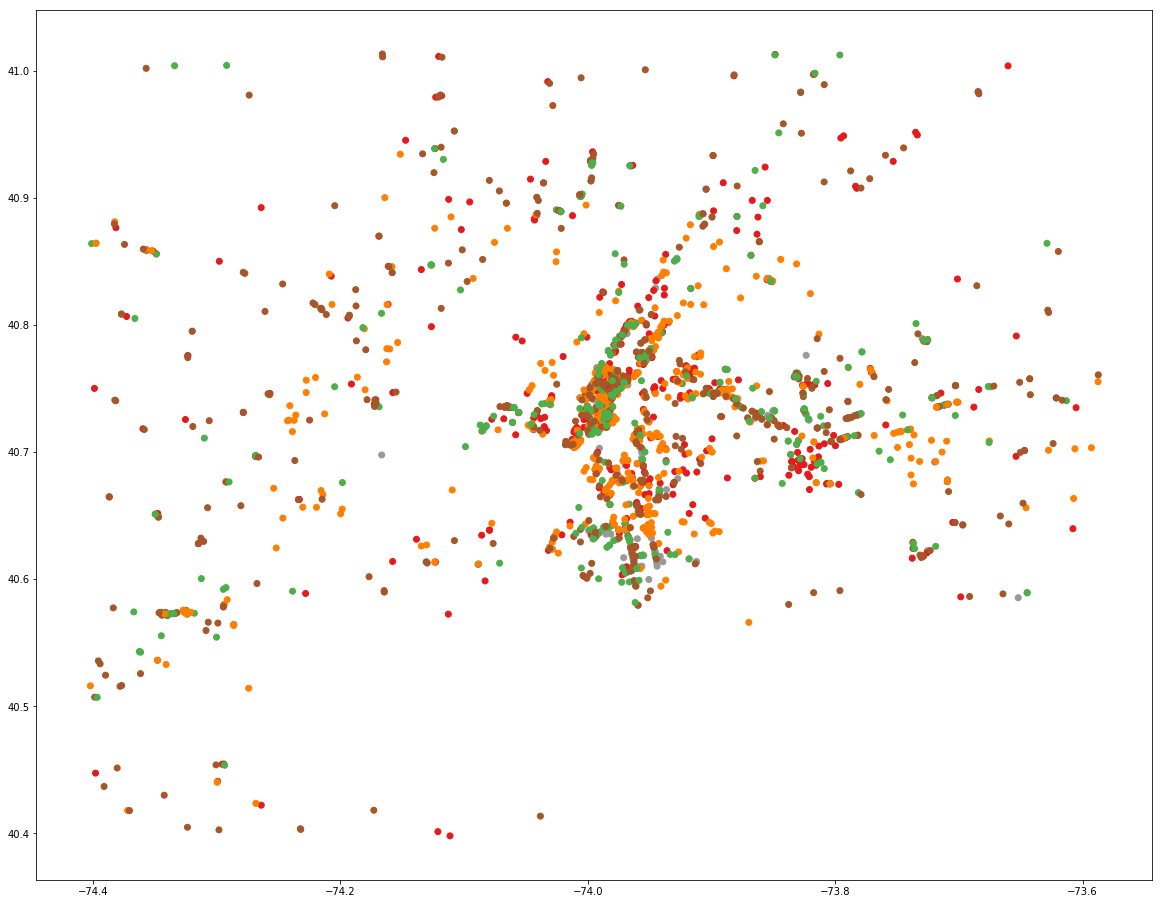

In [124]:
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111)

plt.scatter(res['longitude'], res['latitude'], c=res['label'], cmap='Set1')

In [125]:
res[res['label'] == 0]

,Unnamed: 0,name,alias,cat,categories,geometry,longitude,latitude,address,city,state,zipcode,price,rating,reviews,closed,tr_pickup,tr_delivery,tr_restaurant_reservation,label
339,339,The Wok,the-wok-forest-hills,Kosher,"[{u'alias': u'kosher', u'title': u'Kosher'}]",POINT (-73.84185791020001 40.7206115723),-73.841858,40.720612,"[10021 Queens Blvd, Forest Hills, NY 11375]",Forest Hills,NY,11375.0,2.0,4.0,1,0,0,0,0,0.0
340,340,Ben's Kosher Delicatessen Restaurant & Caterers,bens-kosher-delicatessen-restaurant-and-catere...,Kosher,"[{u'alias': u'delis', u'title': u'Delis'}, {u'...",POINT (-73.62129420000001 40.7423223),-73.621294,40.742322,"[59 Old Country Rd, Carle Place, NY 11514]",Carle Place,NY,11514.0,2.0,3.5,131,0,0,0,0,0.0
341,341,Nobo Wine & Grill,nobo-wine-and-grill-teaneck-2,Kosher,"[{u'alias': u'kosher', u'title': u'Kosher'}]",POINT (-74.0066313744 40.9021363948),-74.006631,40.902136,"[1400 Palisades Ave, Teaneck, NJ 07666]",Teaneck,NJ,7666.0,3.0,3.5,39,0,0,0,1,0.0
342,342,Moshe's Pizza,moshes-pizza-new-york,Kosher,"[{u'alias': u'kosher', u'title': u'Kosher'}, {...",POINT (-73.9688088745 40.6093204021),-73.968809,40.609320,"[509 Avenue P, New York, NY 11223]",New York,NY,11223.0,NaN,3.0,2,0,0,0,0,0.0
343,343,Kensington Kosher Deli,kensington-kosher-deli-great-neck,Kosher,"[{u'alias': u'kosher', u'title': u'Kosher'}, {...",POINT (-73.72802 40.78765),-73.728020,40.787650,"[27A Middle Neck Rd, Great Neck, NY 11021]",Great Neck,NY,11021.0,2.0,4.0,75,0,0,0,0,0.0
344,344,Not Just Bagel And Cheese,not-just-bagel-and-cheese-midwood,Kosher,"[{u'alias': u'coffee', u'title': u'Coffee & Te...",POINT (-73.961624 40.617603),-73.961624,40.617603,"[1304 Avenue M, Midwood, NY 11230]",Midwood,NY,11230.0,1.0,4.0,4,0,0,0,0,0.0
345,345,Zadies Kosher Bake Shop,zadies-kosher-bake-shop-fair-lawn,Kosher,"[{u'alias': u'bakeries', u'title': u'Bakeries'...",POINT (-74.12344559999998 40.9385904),-74.123446,40.938590,"[19-09 Fair Lawn Ave, Fair Lawn, NJ 07410]",Fair Lawn,NJ,7410.0,1.0,4.5,45,0,0,0,0,0.0
346,346,Prima Pizza,prima-pizza-passaic,Kosher,"[{u'alias': u'pizza', u'title': u'Pizza'}, {u'...",POINT (-74.1345749 40.8433669),-74.134575,40.843367,"[224 Brook Ave, Passaic, NJ 07055]",Passaic,NJ,7055.0,2.0,4.5,5,0,0,0,0,0.0
347,347,New Kosher Special,new-kosher-special-elizabeth,Kosher,"[{u'alias': u'kosher', u'title': u'Kosher'}]",POINT (-74.23332909999999 40.6625018),-74.233329,40.662502,"[163 Elmora Ave, Elizabeth, NJ 07202]",Elizabeth,NJ,7202.0,2.0,3.5,15,0,0,0,0,0.0
348,348,Deli King of Clark,deli-king-of-clark-clark-2,Kosher,"[{u'alias': u'delis', u'title': u'Delis'}, {u'...",POINT (-74.31475005600001 40.627704016),-74.314750,40.627704,"[30 Clarkton Dr, Clark, NJ 07066]",Clark,NJ,7066.0,2.0,3.5,62,0,0,0,1,0.0


# SVM

In [ ]:
X = data2.iloc[:,:2]
Y = data2.iloc[:,2]
